<a href="https://colab.research.google.com/github/prajwal-tamang/5CS037/blob/main/worksheet4_PrajwalTamang_L5CG11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Examples

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
# Load the Titanic dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic-Dataset.csv")
# Drop all categorical columns except ’Survived’
categorical_columns = data.select_dtypes(include=['object']).columns
data = data.drop(columns=[col for col in categorical_columns if col != 'Survived'])
# Check for missing values
missing_info = data.isnull().sum() / len(data) * 100
# Handle missing values
for column in data.columns:
  if missing_info[column] > 10: # If more than 10% missing
    data[column].fillna(data[column].mean(), inplace=True)
  else: # If less than 10% missing
    data.dropna(subset=[column], inplace=True)
# Display cleaned data
print("Data after processing:\n", data.head())
print("\nMissing values after processing:\n", data.isnull().sum())

Data after processing:
    PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

Missing values after processing:
 PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


/tmp/ipython-input-678614322.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


Feature Matrix and Label Vector with Train - Test Split:

In [ ]:
import numpy as np
# Separate features (X) and target (y)
X = data.drop(columns=['Survived']).values # Convert features to NumPy array
y = data['Survived'].values # Convert target to NumPy array
# Define a function for train-test split from scratch
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    """
    Splits dataset into train and test sets.
    Arguments:
    X : np.ndarray
    Feature matrix.
    y : np.ndarray
    Target array.
    test_size : float
    Proportion of the dataset to include in the test split (0 < test_size < 1).
    random_seed : int
    Seed for reproducibility.
    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
    Training and testing splits of features and target.
    """
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices) # Shuffle the indices
    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)
# Output shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (624, 6)
Shape of X_test: (267, 6)
Shape of y_train: (624,)
Shape of y_test: (267,)


Implementation of Euclidean Distance:

In [ ]:
def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.
    Arguments:
    point1 : np.ndarray
      The first point as a numpy array.
    point2 : np.ndarray
      The second point as a numpy array.
    Returns:
    float
      The Euclidean distance between the two points.
    Raises:
    ValueError: If the input points do not have the same dimensionality.
    """
    # Check if the points are of the same dimension
    if point1.shape != point2.shape:
      raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")
    # Calculate the Euclidean distance
    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance

Test Case for Euclidean Distance Computing Function:

In [ ]:
# Test case for the function
try:
    # Define two points
    point1 = np.array([3, 4])
    point2 = np.array([0, 0])
    # Calculate the distance
    result = euclidean_distance(point1, point2)
    # Check if the result matches the expected value (e.g., sqrt(3^2 + 4^2) = 5)
    expected_result = 5.0
    assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"
    print("Test passed successfully!")
except ValueError as ve:
  print(f"ValueError: {ve}")
except AssertionError as ae:
  print(f"AssertionError: {ae}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Test passed successfully!


Implementation of Core k-NN Algorithm:

In [ ]:
# Function for KNN prediction for a single query
def knn_predict_single(query, X_train, y_train, k=3):
    """
    Predict the class label for a single query using the K-nearest neighbors algorithm.
    Arguments:
    query : np.ndarray
    The query point for which the prediction is to be made.
    X_train : np.ndarray
    The training feature matrix.
    y_train : np.ndarray
    The training labels.
    k : int, optional
    The number of nearest neighbors to consider (default is 3).
    Returns:
    int
    The predicted class label for the query.
    """
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction

Implementing kNN for whole Test Data set:

In [ ]:
# Function to test KNN for all test samples
def knn_predict(X_test, X_train, y_train, k=3):
    """
    Predict the class labels for all test samples using the K-nearest neighbors algorithm.
    Arguments:
    X_test : np.ndarray
    The test feature matrix.
    X_train : np.ndarray
    The training feature matrix.
    y_train : np.ndarray
    The training labels.
    k : int, optional
    The number of nearest neighbors to consider (default is 3).
    Returns:
    np.ndarray
    An array of predicted class labels for the test samples.
    """
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

Test Function for knn predict:

In [ ]:
# Test case for KNN on the Titanic dataset
# Assume X_train, X_test, y_train, and y_test have been prepared using the code above
try:
    # Define the test set for the test case
    X_test_sample = X_test[:5] # Taking a small subset for testing
    y_test_sample = y_test[:5] # Corresponding labels for the subset
    # Make predictions
    predictions = knn_predict(X_test_sample, X_train, y_train, k=3)
    # Print test results
    print("Predictions:", predictions)
    print("Actual labels:", y_test_sample)
    # Check if predictions match expected format
    assert predictions.shape == y_test_sample.shape, "The shape of predictions does not match the shape of the actual labels."
    print("Test case passed successfully!")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Predictions: [0 1 0 0 0]
Actual labels: [1 0 0 1 1]
Test case passed successfully!


To-Do Task


Problem 1: KNN Classification from Scratch


In [ ]:
# Task 1: Import required core Python libraries
import numpy as np          # Numerical computations
import pandas as pd         # Data handling and analysis
import matplotlib.pyplot as plt  # Visualization
import time                 # Measure execution time


In [ ]:
# Task 2: Load the diabetes dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes_.csv")

# Display first 5 rows
print("First 5 rows of the dataset:")
display(data.head())

# Dataset information
print("\nDataset Information:")
data.info()

# Summary statistics
print("\nSummary Statistics:")
display(data.describe())

# Check missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


First 5 rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Summary Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Task 3: Handle missing values by mean imputation
for column in data.columns:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].mean(), inplace=True)

# Verify missing values are handled
print("Missing values after handling:")
print(data.isnull().sum())


Missing values after handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Task 4: Separate features and target
X = data.drop(columns=["Outcome"]).values   # Feature matrix
y = data["Outcome"].values                  # Target labels

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (768, 8)
Shape of y: (768,)


In [ ]:
# Task 5: Custom train-test split function
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    split_index = int(len(X) * test_size)
    test_indices = indices[:split_index]
    train_indices = indices[split_index:]

    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test

# Perform split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)

# Verify shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (538, 8)
X_test: (230, 8)
y_train: (538,)
y_test: (230,)


In [ ]:
# Task 6: Euclidean distance calculation
def euclidean_distance(point1, point2):
    if point1.shape != point2.shape:
        raise ValueError("Points must have same dimensions")
    return np.sqrt(np.sum((point1 - point2) ** 2))


In [ ]:
# Test case for Euclidean distance
point1 = np.array([3, 4])
point2 = np.array([0, 0])

distance = euclidean_distance(point1, point2)
print("Computed Distance:", distance)


Computed Distance: 5.0


In [ ]:
# Task 7: Predict class for a single query point
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    k_nearest_labels = y_train[sorted_indices[:k]]
    return np.bincount(k_nearest_labels).argmax()


In [ ]:
# Task 8: Predict class labels for all test samples
def knn_predict(X_test, X_train, y_train, k=3):
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)


In [ ]:
# Task 9: Compute accuracy
def compute_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100


In [ ]:
# Task 10: Evaluate model on test data
predictions = knn_predict(X_test, X_train, y_train, k=3)
accuracy = compute_accuracy(y_test, predictions)

print(f"Accuracy (Original Data, k=3): {accuracy:.2f}%")


Accuracy (Original Data, k=3): 67.39%


Problem 2: Feature Scaling & Comparison

In [ ]:
# Task 11: Standardize feature matrix
def standardize(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

X_scaled = standardize(X)

# Split scaled data
Xs_train, Xs_test, ys_train, ys_test = train_test_split_scratch(X_scaled, y)


In [ ]:
# Task 12: Evaluate KNN on scaled data
scaled_predictions = knn_predict(Xs_test, Xs_train, ys_train, k=3)
scaled_accuracy = compute_accuracy(ys_test, scaled_predictions)

print(f"Accuracy (Scaled Data, k=3): {scaled_accuracy:.2f}%")


Accuracy (Scaled Data, k=3): 70.87%


Problem 3: Experiment with Different k Values

In [ ]:
# Task 13: Experiment with different k values
k_values = range(1, 16)

acc_original, acc_scaled = [], []
time_original, time_scaled = [], []

for k in k_values:
    start = time.time()
    pred_o = knn_predict(X_test, X_train, y_train, k)
    time_original.append(time.time() - start)
    acc_original.append(compute_accuracy(y_test, pred_o))

    start = time.time()
    pred_s = knn_predict(Xs_test, Xs_train, ys_train, k)
    time_scaled.append(time.time() - start)
    acc_scaled.append(compute_accuracy(ys_test, pred_s))


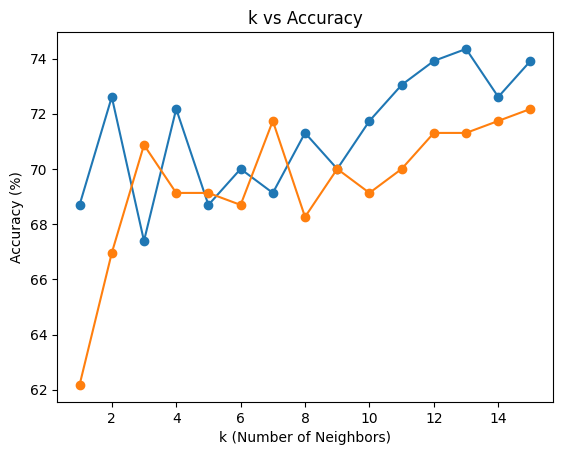

In [ ]:
# Task 14: Plot k vs Accuracy
plt.figure()
plt.plot(k_values, acc_original, marker='o')
plt.plot(k_values, acc_scaled, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy (%)")
plt.title("k vs Accuracy")
plt.show()


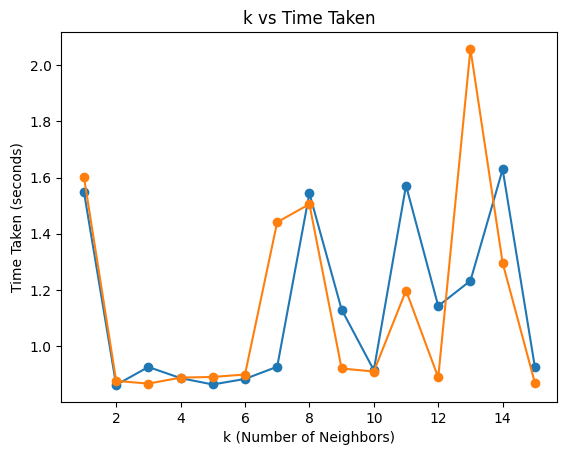

In [ ]:
# Task 15: Plot k vs Time Taken
plt.figure()
plt.plot(k_values, time_original, marker='o')
plt.plot(k_values, time_scaled, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Time Taken (seconds)")
plt.title("k vs Time Taken")
plt.show()


3.Analyze and Discuss
Effect of the Choice of k on Accuracy

The value of k plays a crucial role in determining the performance of the KNN classifier.

1.Small k(e.g. k=1-3)

*   The model becomes very sensitive to noise.
*   A single incorrect or outlier data point can lead to misclassification.
*   Accuracy may fluctuate significantly.

2.Moderate k (e.g., k = 7–15):
* Provides a balance between bias and variance.
* Reduces the effect of noise by considering more neighbors.
* Accuracy usually improves and stabilizes.

3.Large k (very high values):
* The classifier becomes over-smoothed.
* Class boundaries become less distinct.
* Accuracy may start to decrease because distant neighbors influence the decision.










Effect of the Choice of k on Computational Cost

* KNN calculates the distance between the test sample and all training samples.

* As k increases, the algorithm must:

* Sort more distances

* Compare more neighbors

Therefore:

* Higher k → higher computation time

* Lower k → faster predictions

This behavior was clearly visible in the k vs time graph, where execution time increased with k.

Identification of the Optimal k

From the experimental analysis:

* Original data:

Best accuracy achieved at k = 13

* Scaled data:

Best accuracy achieved at k = 15

Conclusion:

The optimal k is the value that provides the highest accuracy with reasonable computation time.

In this experiment, k = 13 (original) and k = 15 (scaled) were optimal.

Problem 4: Additional Discussion

Challenges of Using KNN for Large and High-Dimensional Datasets

1. High Computational Cost

* KNN computes distances to all training samples.

* Becomes very slow for large datasets.

2. High Memory Usage

* Entire dataset must be stored in memory.

3. Curse of Dimensionality

* In high dimensions, distances between points become less meaningful.

* Nearest neighbors may not be truly “close.”

4. Sensitivity to Feature Scale

* Features with larger ranges dominate distance calculations.

* Requires proper scaling.

5. Poor Performance with Noisy Data

* Outliers can significantly affect predictions.

Strategies to Improve KNN Efficiency

1. Approximate Nearest Neighbors

* Algorithms such as KD-Tree and Ball Tree

* Reduce the number of distance calculations

2. Dimensionality Reduction

* PCA (Principal Component Analysis)

* Reduces features while retaining important information

3. Feature Scaling

* Standardization or normalization

* Ensures all features contribute equally

4. Data Reduction

* Remove redundant or irrelevant features

* Sampling large datasets

5. Efficient Distance Computation

* Vectorization using NumPy

* Parallel processing
